<a href="https://colab.research.google.com/github/ShivaniLad/My-Work/blob/main/Implementation_with_ad_click_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation with Ad-click Dataset

## Mounting with drive

In [57]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [100]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC

## Loading the data from drive

In [59]:
data = pd.read_csv("/content/drive/MyDrive/1Rivet/ML & Python/Case Studies/Second/Ad click data.csv")
data

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,57756.89,195.68,product_29,Jersey,City_4,Yes,Night,Thursday,April,2020,0
6653,1199837,72.23,23,52968.22,247.90,product_25,Madagascar,City_5,Yes,Noon,Sunday,July,2020,0
6654,8523595,57.20,56,24079.00,129.23,product_24,Algeria,City_2,No,Morning,Thursday,April,2020,1
6655,2584490,88.04,28,64188.50,241.03,product_18,Bosnia and Herzegovina,City_7,Yes,Mid-Night,Friday,January,2020,0


## Data Visualization

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [61]:
data.isna().count()

VistID            6657
Time_Spent        6657
Age               6657
Avg_Income        6657
Internet_Usage    6657
Ad_Topic          6657
Country_Name      6657
City_code         6657
Male              6657
Time_Period       6657
Weekday           6657
Month             6657
Year              6657
Clicked           6657
dtype: int64

In [62]:
data.describe()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657.0,6657.000000
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,2020.0,1.000000
max,9.999708e+06,91.430000,61.000000,79484.800000,269.960000,2020.0,1.000000


In [63]:
data['Ad_Topic'].unique()

array(['product_11', 'product_8', 'product_6', 'product_19', 'product_10',
       'product_1', 'product_29', 'product_18', 'product_7', 'product_27',
       'product_4', 'product_13', 'product_5', 'product_2', 'product_23',
       'product_24', 'product_28', 'product_30', 'product_26',
       'product_16', 'product_3', 'product_25', 'product_21',
       'product_15', 'product_12', 'product_17', 'product_20',
       'product_14', 'product_9', 'product_22'], dtype=object)

In [64]:
data['Clicked'].unique()

array([0, 1])

In [65]:
data['Time_Period'].unique()

array(['Mid-Night', 'Evening', 'Morning', 'Noon', 'Early-Morning',
       'Night'], dtype=object)

In [66]:
data['Country_Name'].unique()

array(['Serbia', 'Turkmenistan', 'Northern Mariana Islands',
       'South Africa', 'Guadeloupe', 'Guernsey', 'Anguilla',
       'Switzerland', 'Niue', 'Norfolk Island', 'Portugal', 'Belize',
       'Syrian Arab Republic', 'Puerto Rico', 'Costa Rica', 'Sweden',
       'Sierra Leone', 'Mauritius', 'Malawi', 'Austria', 'Saint Helena',
       'Trinidad and Tobago', 'Italy', "Cote d'Ivoire", 'Burundi',
       'Belarus', 'Holy See (Vatican City State)',
       'Bosnia and Herzegovina', 'Seychelles', 'Mozambique', 'Lesotho',
       'Antarctica (the territory South of 60 deg S)', 'Haiti',
       'Singapore', 'Bangladesh', 'Niger', 'Cyprus', 'Japan',
       'Luxembourg', 'Sudan', 'Libyan Arab Jamahiriya', 'Algeria',
       'Uruguay', 'Martinique', 'Colombia', 'Liberia', 'Bulgaria',
       'Argentina', 'Bouvet Island (Bouvetoya)', 'Brazil', 'Panama',
       "Lao People's Democratic Republic", 'Palau', 'Australia',
       'Morocco', 'Mexico', 'Greece', 'Mayotte', 'Kiribati', 'Armenia',
       'S

### Co-relating the data.

Text(0.5, 1.0, 'Correlation between data.')

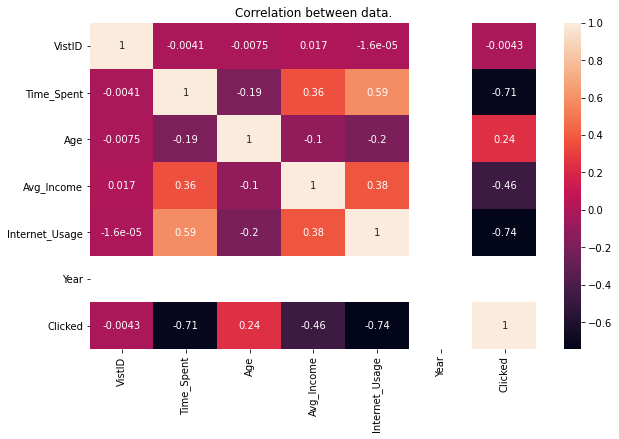

In [67]:
crm = data.corr()
 
# plotting the crm data into graph
plt.figure(figsize= (10, 6))
sn.heatmap(crm, annot= True)
plt.title('Correlation between data.')

Highest correlation is between Age and Clicked.

## Removing unneccessary columns from the dataset

In [68]:
data = data.drop(['Year', 'Month', 'Avg_Income', 'Internet_Usage'], axis= 1)
data

,VistID,Time_Spent,Age,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Clicked
0,5183153,87.97,43,product_11,Serbia,City_5,No,Mid-Night,Thursday,0
1,4023265,51.63,50,product_8,Turkmenistan,City_1,No,Evening,Saturday,1
2,4708083,82.37,38,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,0
3,9771815,62.06,45,product_19,South Africa,City_3,Yes,Morning,Thursday,1
4,6451317,77.66,31,product_11,Guadeloupe,City_2,No,Noon,Thursday,0
...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,product_29,Jersey,City_4,Yes,Night,Thursday,0
6653,1199837,72.23,23,product_25,Madagascar,City_5,Yes,Noon,Sunday,0
6654,8523595,57.20,56,product_24,Algeria,City_2,No,Morning,Thursday,1
6655,2584490,88.04,28,product_18,Bosnia and Herzegovina,City_7,Yes,Mid-Night,Friday,0


## Data Preprocessing

In [69]:
le = LabelEncoder()

# encoding Ad_Topic column using LabelEncoder.
data['Ad_Topic'] = le.fit_transform(data['Ad_Topic'])
data

,VistID,Time_Spent,Age,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Clicked
0,5183153,87.97,43,2,Serbia,City_5,No,Mid-Night,Thursday,0
1,4023265,51.63,50,28,Turkmenistan,City_1,No,Evening,Saturday,1
2,4708083,82.37,38,26,Northern Mariana Islands,City_2,No,Morning,Tuesday,0
3,9771815,62.06,45,10,South Africa,City_3,Yes,Morning,Thursday,1
4,6451317,77.66,31,2,Guadeloupe,City_2,No,Noon,Thursday,0
...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,21,Jersey,City_4,Yes,Night,Thursday,0
6653,1199837,72.23,23,17,Madagascar,City_5,Yes,Noon,Sunday,0
6654,8523595,57.20,56,16,Algeria,City_2,No,Morning,Thursday,1
6655,2584490,88.04,28,9,Bosnia and Herzegovina,City_7,Yes,Mid-Night,Friday,0


In [70]:
# encoding Country_Name column using LabelEncoder.
data['Country_Name'] = le.fit_transform(data['Country_Name'])
data

,VistID,Time_Spent,Age,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Clicked
0,5183153,87.97,43,2,188,City_5,No,Mid-Night,Thursday,0
1,4023265,51.63,50,28,217,City_1,No,Evening,Saturday,1
2,4708083,82.37,38,26,157,City_2,No,Morning,Tuesday,0
3,9771815,62.06,45,10,195,City_3,Yes,Morning,Thursday,1
4,6451317,77.66,31,2,83,City_2,No,Noon,Thursday,0
...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,21,106,City_4,Yes,Night,Thursday,0
6653,1199837,72.23,23,17,125,City_5,Yes,Noon,Sunday,0
6654,8523595,57.20,56,16,2,City_2,No,Morning,Thursday,1
6655,2584490,88.04,28,9,26,City_7,Yes,Mid-Night,Friday,0


In [71]:
# encoding City_Code column using LabelEncoder.
data['City_code'] = le.fit_transform(data['City_code'])
data

,VistID,Time_Spent,Age,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Clicked
0,5183153,87.97,43,2,188,4,No,Mid-Night,Thursday,0
1,4023265,51.63,50,28,217,0,No,Evening,Saturday,1
2,4708083,82.37,38,26,157,1,No,Morning,Tuesday,0
3,9771815,62.06,45,10,195,2,Yes,Morning,Thursday,1
4,6451317,77.66,31,2,83,1,No,Noon,Thursday,0
...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,21,106,3,Yes,Night,Thursday,0
6653,1199837,72.23,23,17,125,4,Yes,Noon,Sunday,0
6654,8523595,57.20,56,16,2,1,No,Morning,Thursday,1
6655,2584490,88.04,28,9,26,6,Yes,Mid-Night,Friday,0


In [72]:
# encoding Time_Period column using LabelEncoder.
data['Male'] = le.fit_transform(data['Male'])
data

,VistID,Time_Spent,Age,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Clicked
0,5183153,87.97,43,2,188,4,0,Mid-Night,Thursday,0
1,4023265,51.63,50,28,217,0,0,Evening,Saturday,1
2,4708083,82.37,38,26,157,1,0,Morning,Tuesday,0
3,9771815,62.06,45,10,195,2,1,Morning,Thursday,1
4,6451317,77.66,31,2,83,1,0,Noon,Thursday,0
...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,21,106,3,1,Night,Thursday,0
6653,1199837,72.23,23,17,125,4,1,Noon,Sunday,0
6654,8523595,57.20,56,16,2,1,0,Morning,Thursday,1
6655,2584490,88.04,28,9,26,6,1,Mid-Night,Friday,0


In [73]:
# encoding Time_Period column using LabelEncoder.
data['Time_Period'] = le.fit_transform(data['Time_Period'])
data

,VistID,Time_Spent,Age,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Clicked
0,5183153,87.97,43,2,188,4,0,2,Thursday,0
1,4023265,51.63,50,28,217,0,0,1,Saturday,1
2,4708083,82.37,38,26,157,1,0,3,Tuesday,0
3,9771815,62.06,45,10,195,2,1,3,Thursday,1
4,6451317,77.66,31,2,83,1,0,5,Thursday,0
...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,21,106,3,1,4,Thursday,0
6653,1199837,72.23,23,17,125,4,1,5,Sunday,0
6654,8523595,57.20,56,16,2,1,0,3,Thursday,1
6655,2584490,88.04,28,9,26,6,1,2,Friday,0


In [74]:
# encoding Weekday column using LabelEncoder.
data['Weekday'] = le.fit_transform(data['Weekday'])
data

,VistID,Time_Spent,Age,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Clicked
0,5183153,87.97,43,2,188,4,0,2,4,0
1,4023265,51.63,50,28,217,0,0,1,2,1
2,4708083,82.37,38,26,157,1,0,3,5,0
3,9771815,62.06,45,10,195,2,1,3,4,1
4,6451317,77.66,31,2,83,1,0,5,4,0
...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,21,106,3,1,4,4,0
6653,1199837,72.23,23,17,125,4,1,5,3,0
6654,8523595,57.20,56,16,2,1,0,3,4,1
6655,2584490,88.04,28,9,26,6,1,2,0,0


## Splitting the data

In [75]:
x = data.drop(['Clicked'], axis = 1)
y = data['Clicked']

In [76]:
# splitting x and y to train test split

xtrain, xtest, ytrain ,ytest = train_test_split(x, y, test_size= 0.7)

## Decision Tree Classifier

In [87]:
model = DecisionTreeClassifier(criterion= 'entropy')

# fitting training value into model
model.fit(xtrain, ytrain)

# predicting the testing data
ypred = model.predict(xtest)

# Model Accuracy
print("Accuracy : ", accuracy_score(ytest, ypred) * 100)

# Confusion metrix
print("\n Confusion Metrix : \n", confusion_matrix(ytest, ypred))

# Classification Report
print("\n Classification Report : \n", classification_report(ytest, ypred))

Accuracy :  81.69527896995709

 Confusion Metrix : 
 [[2106  456]
 [ 397 1701]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2562
           1       0.79      0.81      0.80      2098

    accuracy                           0.82      4660
   macro avg       0.81      0.82      0.82      4660
weighted avg       0.82      0.82      0.82      4660



## KNN 

In [93]:
model = KNeighborsClassifier(n_neighbors= 10)

# fitting training value into model
model.fit(xtrain, ytrain)

# predicting the testing data
ypred = model.predict(xtest)

# Model Accuracy
print("Accuracy : ", accuracy_score(ytest, ypred) * 100)

# Confusion metrix
print("\n Confusion Metrix : \n", confusion_matrix(ytest, ypred))

# Classification Report
print("\n Classification Report : \n", classification_report(ytest, ypred))

Accuracy :  52.29613733905579

 Confusion Metrix : 
 [[1761  801]
 [1422  676]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.55      0.69      0.61      2562
           1       0.46      0.32      0.38      2098

    accuracy                           0.52      4660
   macro avg       0.51      0.50      0.50      4660
weighted avg       0.51      0.52      0.51      4660



## Linear Regression

In [98]:
model = LinearRegression()

# fitting training value into model
model.fit(xtrain, ytrain)

# predicting the testing data
ypred = model.predict(xtest)

# Model Accuracy
print("Accuracy : ", r2_score(ytest, ypred) * 100)

Accuracy :  52.87331215862115


## Logistic Regression

In [99]:
model = LogisticRegression()

# fitting training value into model
model.fit(xtrain, ytrain)

# predicting the testing data
ypred = model.predict(xtest)

# Model Accuracy
print("Accuracy : ", accuracy_score(ytest, ypred) * 100)

# Confusion metrix
print("\n Confusion Metrix : \n", confusion_matrix(ytest, ypred))

# Classification Report
print("\n Classification Report : \n", classification_report(ytest, ypred))

Accuracy :  54.97854077253219

 Confusion Metrix : 
 [[2562    0]
 [2098    0]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.55      1.00      0.71      2562
           1       0.00      0.00      0.00      2098

    accuracy                           0.55      4660
   macro avg       0.27      0.50      0.35      4660
weighted avg       0.30      0.55      0.39      4660



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVC

In [104]:
model = SVC(kernel= 'linear')

# fitting training value into model
model.fit(xtrain, ytrain)

# predicting the testing data
ypred = model.predict(xtest)

# Model Accuracy
print("Accuracy : ", accuracy_score(ytest, ypred) * 100)

# Confusion metrix
print("\n Confusion Metrix : \n", confusion_matrix(ytest, ypred))

# Classification Report
print("\n Classification Report : \n", classification_report(ytest, ypred))

Accuracy :  56.99570815450644

 Confusion Metrix : 
 [[2383  179]
 [1825  273]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.57      0.93      0.70      2562
           1       0.60      0.13      0.21      2098

    accuracy                           0.57      4660
   macro avg       0.59      0.53      0.46      4660
weighted avg       0.58      0.57      0.48      4660

